<a href="https://colab.research.google.com/github/SurabhiMore/Resume-Classifier/blob/master/Resume_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
data = pd.DataFrame(pd.read_csv('/content/final data.csv', encoding = 'latin1'))

In [ ]:
data.head(300)

,resume string,Category,Broad_Category
0,RESUME \nBhavik V Bhirud \nMobile No: +91 92...,admin_bpo,admin and support
1,\nSaurav Mishra \n9998739620 \nsauravmis22...,admin_bpo,admin and support
2,\nCurriculum Vitae \n \nSapna Ahuja \nEmail...,admin_bpo,admin and support
3,PRASHANT SHUKLA \nTemporary Address: Princ le...,admin_bpo,admin and support
4,06-08-2020 -\nStill continue\n03-12-2019 -\n...,admin csr,admin and support
...,...,...,...
277,\n \nMERN STACK DEVELOPER \nAmit Chauhan ...,full stack,Web developer
278,Resume \n \nMohd Asif \nContact No.: - 8858...,full stack,Web developer
279,Monisha Arumugam \nMobile No .: 8072261708 \...,full stack,Web developer
280,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n...,full stack,Web developer


In [ ]:
data.rename(columns={'resume string':'resume_string'}, inplace = True)

In [ ]:
pd.set_option('display.max_columns', 1000);
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 1000)

In [ ]:
print("Distinct categories of resume: ")
print(data['Category'].unique())

Distinct categories of resume: 
['admin_bpo' 'admin csr' 'backend_dotnet' 'backend_java' 'backend_nodejs'
 'bigdata' 'business_analyst' 'cloud_dev' 'cms_drupal' 'cms_shopify'
 'cms_wordpress' 'data_engineer' 'datascientist' 'data_analyst' 'DBA'
 'eng_and_arch' 'finance' 'graphic' 'hr training' 'lead generation'
 'legal' 'marketing' 'mobileapp_android' 'mobileapp_ios' 'salesforce'
 'sap_abap' 'ui_ux' 'writing' 'backend_python' 'frontend developer'
 'full stack']


In [ ]:
print("Broad categories of resume: ")
print(data['Broad_Category'].unique())

Broad categories of resume: 
['admin and support' 'Web developer' 'bigdata' 'business_analyst'
 'cloud_dev' 'cms' 'AI_ML' 'DBA' 'eng_and_arch' 'finance'
 'Design and Creative' 'hr training' 'sales and marketing' 'legal'
 'Mobile app developer' 'ERP' 'ui_ux' 'writing']


In [ ]:
print("DISTINCT CATEGORIES: \n", data['Category'].value_counts())
print("\n")
print("Broad CATEGORIES: \n", data['Broad_Category'].value_counts())

DISTINCT CATEGORIES: 
 backend_python        14
backend_java          13
marketing             11
hr training           11
cloud_dev             11
cms_drupal            11
legal                 11
finance               10
salesforce            10
DBA                   10
sap_abap              10
eng_and_arch          10
cms_shopify           10
business_analyst      10
bigdata               10
backend_nodejs        10
frontend developer    10
cms_wordpress         10
ui_ux                  9
mobileapp_android      9
full stack             9
admin csr              9
lead generation        8
mobileapp_ios          8
data_analyst           7
datascientist          7
data_engineer          7
writing                5
backend_dotnet         5
admin_bpo              4
graphic                3
Name: Category, dtype: int64


Broad CATEGORIES: 
 Web developer           61
cms                     31
AI_ML                   21
ERP                     20
sales and marketing     19
Mobile app devel

WE HAVE 18 BROAD CATEGORIES

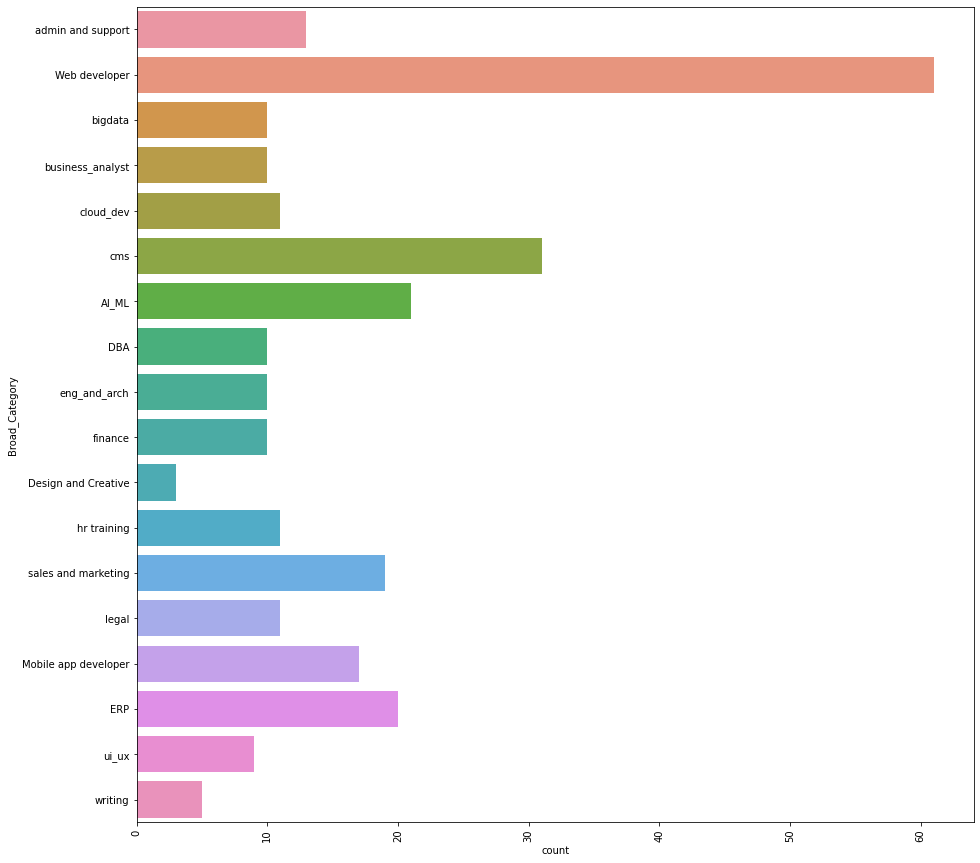

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Broad_Category", data=data)

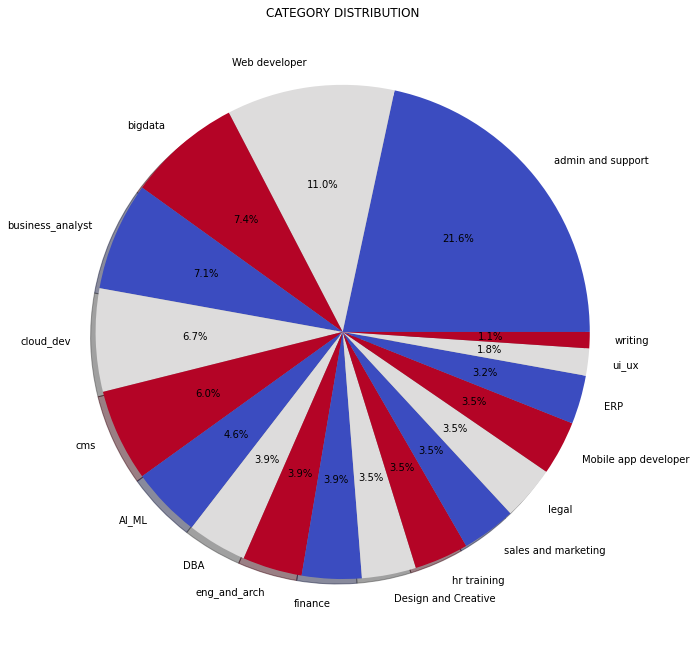

In [ ]:
from matplotlib.gridspec import GridSpec
targetCounts = data['Broad_Category'].value_counts()
targetLabels  = data['Broad_Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

**Data Preprocessing**

In [ ]:
data['resume_string'][0]

'RESUME  \nBhavik V Bhirud  \nMobile No: +91 9276834314  \nE-Mail:  bhirudbhavik@gmail.co m \nAddress: B â\x80\x93 23 Gokulnagar, Adinathnagar Nr  \nJadeshwar Temple Odhav, Ahmedabad - 382415  \nCareer Objective  \nï\x82· To Obtain  a challenging position in a high quality engineering environment where my \nresourceful experience and academic skills will add value to organizational  operations.ï\x80\xa0\n \nAcademics  \n \n \nDegree  University/Board  Percentage  Year  \nIT ITCT  A+ June 2012  \nGT-ADCHNPRO  GT Comp Hardware Engineering College  61.00 %  April 2010  \nH.S.C.  National Institute of Open Schooling  57.6 %  March 2012  \nS.S.C  GSEB, Gandhinagar  54.71 %  March 2005  \n \nTechnical Skills  \n \n \nProgramming Languages  C, C++, HTML, DHTML, V.B, .Net, Java  \nDatabase  Oracle  \nPlatforms  Windows XP/7/10,  \n \nEmployer  \nï\x82· Currently Working as Customer Interaction Executive in Benchmark Motors pvt ltd ï\x80\xa0\nï\x82· Mercedes Benz Benchmark Cars from Augâ\x80\x9

In [ ]:
dataL = data['resume_string'].values.tolist()
col = pd.Series(dataL)
fr = {"all_cols":col}
df = pd.DataFrame(fr)
df['all_cols'] = df['all_cols'].str.lower()

In [ ]:
df['all_cols']

0      resume  \nbhavik v bhirud  \nmobile no: +91 92...
1       \nsaurav  mishra  \n9998739620  \nsauravmis22...
2       \ncurriculum vitae  \n \nsapna ahuja  \nemail...
3      prashant shukla  \ntemporary address: princ le...
4      06-08-2020  -\nstill continue\n03-12-2019  -\n...
5      vrushal fadanvis \nbusiness development associ...
6       \n \nnaina ramesh pophale  \nocc analyst  \ne...
7      nehakumari\nnewt-92streetno.7,uttamnagarwest,n...
8       \n \n    \nsalman sayed   \n  \nphone: (m)  +...
9       \n ankit masih  \ninstrumentation and control...
10     resume  \n \n \n \n \nrohi t verma  \n9/2341 s...
11       \n              mayank shukla  professional ...
12      \nsaurav  mishra  \n9998739620  \nsauravmis22...
13      \nkhyati gauswami  \n \nsoftware engineer (d ...
14     amol  samgir  \namolsamgir@gmail.com  \n+91 - ...
15     k satya narayana  \nweb developer  \n \n \n \n...
16      \ninternal use - confidential  angular  2/4/5...
17     papireddy potalapalli   

In [ ]:
#remove punctuation
import re
import string
df['all_cols'] = df['all_cols'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
df['all_cols']

0      resum bhavik v bhiru mobil 91 9276834314 email...
1      saurav mishra 9998739620 sauravmis22 gmailcom ...
2      curriculum vita sapna ahuja email sapnaahuja20...
3      prashant shukla temporari princ ley estat sect...
4      06082020 still continu 03122019 30072020 shukl...
5      vrushal faanvi busi evelop associ experi busi ...
6      naina ramesh pophal occ analyst email pophalen...
7      nehakumari newt92streetno7uttamnagarwestnewelh...
8      salman say phone 91 9967058192 91 9664509010 e...
9      ankit masih instrument control engin mobil 91 ...
10     resum rohi verma 92341 street 12 kailash nagar...
11     mayank shukla profess profil custom success pr...
12     saurav mishra 9998739620 sauravmis22 gmailcom ...
13     khyati gauswami softwar engin otnet evelop pho...
14     amol samgir amolsamgirgmailcom 91 9970689178 p...
15     k satya narayana web evelop career object emai...
16     intern use confienti angular 24567 aspnet core...
17     papirey potalap e mail p

In [ ]:
#remove words and digits
df['all_cols'] = df['all_cols'].apply(lambda x: re.sub('W*dw*','',x))
df['all_cols']

0      resume  \nbhavik v bhiru  \nmobile no 91 92768...
1       \nsaurav  mishra  \n9998739620  \nsauravmis22...
2       \ncurriculum vitae  \n \nsapna ahuja  \nemail...
3      prashant shukla  \ntemporary aress princ ley e...
4      06082020  \nstill continue\n03122019  \n300720...
5      vrushal faanvis \nbusiness evelopment associat...
6       \n \nnaina ramesh pophale  \nocc analyst  \ne...
7      nehakumari\nnewt92streetno7uttamnagarwestnewel...
8       \n \n    \nsalman saye   \n  \nphone m  91 99...
9       \n ankit masih  \ninstrumentation an control ...
10     resume  \n \n \n \n \nrohi t verma  \n92341 st...
11       \n              mayank shukla  professional ...
12      \nsaurav  mishra  \n9998739620  \nsauravmis22...
13      \nkhyati gauswami  \n \nsoftware engineer  ot...
14     amol  samgir  \namolsamgirgmailcom  \n91  9970...
15     k satya narayana  \nweb eveloper  \n \n \n \nc...
16      \ninternal use  confiential  angular  24567  ...
17     papirey potalapalli     

In [ ]:
#remove stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['all_cols'] = df['all_cols'].apply(lambda x: remove_stopwords(x))
df['all_cols']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0      resum bhavik v bhiru mobil 91 9276834314 email...
1      saurav mishra 9998739620 sauravmis22 gmailcom ...
2      curriculum vita sapna ahuja email sapnaahuja20...
3      prashant shukla temporari princ ley estat sect...
4      06082020 still continu 03122019 30072020 shukl...
5      vrushal faanvi busi evelop associ experi busi ...
6      naina ramesh pophal occ analyst email pophalen...
7      nehakumari newt92streetno7uttamnagarwestnewelh...
8      salman say phone 91 9967058192 91 9664509010 e...
9      ankit masih instrument control engin mobil 91 ...
10     resum rohi verma 92341 street 12 kailash nagar...
11     mayank shukla profess profil custom success pr...
12     saurav mishra 9998739620 sauravmis22 gmailcom ...
13     khyati gauswami softwar engin otnet evelop pho...
14     amol samgir amolsamgirgmailcom 91 9970689178 p...
15     k satya narayana web evelop career object emai...
16     intern use confienti angular 24567 aspnet core...
17     papirey potalap e mail p

In [ ]:
#stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
df['all_cols'] = df['all_cols'].apply(lambda x: stem_words(x))
df['all_cols']

0      resum bhavik v bhiru mobil 91 9276834314 email...
1      saurav mishra 9998739620 sauravmis22 gmailcom ...
2      curriculum vita sapna ahuja email sapnaahuja20...
3      prashant shukla temporari princ ley estat sect...
4      06082020 still continu 03122019 30072020 shukl...
5      vrushal faanvi busi evelop associ experi busi ...
6      naina ramesh pophal occ analyst email pophalen...
7      nehakumari newt92streetno7uttamnagarwestnewelh...
8      salman say phone 91 9967058192 91 9664509010 e...
9      ankit masih instrument control engin mobil 91 ...
10     resum rohi verma 92341 street 12 kailash nagar...
11     mayank shukla profess profil custom success pr...
12     saurav mishra 9998739620 sauravmis22 gmailcom ...
13     khyati gauswami softwar engin otnet evelop pho...
14     amol samgir amolsamgirgmailcom 91 9970689178 p...
15     k satya narayana web evelop career object emai...
16     intern use confienti angular 24567 aspnet core...
17     papirey potalap e mail p

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = nltk.WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df['all_cols'] = df['all_cols'].apply(lambda text: lemmatize_words(text))
df['all_cols'][0]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


'resum bhavik v bhiru mobil 91 9276834314 email bhirubhavikgmailco are b â\x80\x93 23 gokulnagar ainathnagar nr jaeshwar templ ohav ahmeaba 382415 career object ï\x82· obtain challeng posit high qualiti engin environ resourc experi acaem skill valu organiz operationsï\x80 acaem egr universityboar percentag year itct june 2012 gtachnpro gt comp harar engin colleg 6100 april 2010 hsc nation institut open school 576 march 2012 ssc gseb ganhinagar 5471 march 2005 technic skill program languag c c html html vb net java ataba oracl platform winow xp710 employ ï\x82· current work custom interact execut benchmark motor pvt lt ï\x80 ï\x82· merc benz benchmark car augâ\x80\x992017 ï\x80 ï\x82· iea sa post pai epart 2016ï\x80 ï\x82· shree krishna ham pvt lt c ustom sale execut 2015ï\x80 ï\x80'

**Whatever you did**

In [ ]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [ ]:
data['cleaned_resume'] = ''

In [ ]:
data['cleaned_resume'] = data.resume_string.apply(lambda x: cleanResume(x))
print (data['cleaned_resume'][31])

A K S H A Y K R I S H N A T A M B E E m a i l t m a k s h a y 5 9 g m a i l c o m P h o n e M 9 1 8 8 2 8 3 3 1 7 3 8 C A R E E R O B J E C T I V E L o o k i n g f o r a l e a r n i n g c h a l l e n g i n g p r o g r e s s i v e c a r e e r i n a r e p u t e d c o m p a n y w h i c h c o u l d p r o v i d e m e w i t h e n o u g h o p p o r t u n i t i e s t o a p p l y m y k n o w l e d g e f o r r e a c h i n g o r g a n i z a t i o n a l g o a l a s w e l l a s m y p e r s o n a l e n h a n c e m e n t C A R E E R S Y N O P S I S T o t a l E x p e r i e n c e 7 y e a r s a s p h p d e v e l o p e r 1 y e a r a s n o d e j s d e v e l o p e r 3 y e a r s a s U I D e v e l o p e r C o m p l e t e d S k i l l E n h a n c e m e n t P r o g r a m P H P N o d e J S E x p r e s s M o n g o D B M y s q l L a r a v e l C o d e i g n i t e r M V C F r a m e w o r k B o o t s t r a p j Q u e r y H T M L 5 Q u i c k l e a r n e r w i t h c o n s t a n t p a s s i o n t o a c q u i r e n e w s 

In [ ]:
data['cleaned_resume'] = data['resume_string'].apply(lambda x: cleanResume(x))
data.head(20)

,resume_string,Category,Broad_Category,cleaned_resume
0,RESUME \nBhavik V Bhirud \nMobile No: +91 92...,admin_bpo,admin and support,RESUME Bhavik V Bhirud Mobile No 91 9276834314...
1,\nSaurav Mishra \n9998739620 \nsauravmis22...,admin_bpo,admin and support,Saurav Mishra 9998739620 sauravmis22 ADDRESS ...
2,\nCurriculum Vitae \n \nSapna Ahuja \nEmail...,admin_bpo,admin and support,Curriculum Vitae Sapna Ahuja Email sapna ahuj...
3,PRASHANT SHUKLA \nTemporary Address: Princ le...,admin_bpo,admin and support,PRASHANT SHUKLA Temporary Address Princ ley Es...
4,06-08-2020 -\nStill continue\n03-12-2019 -\n...,admin csr,admin and support,06 08 2020 Still continue 03 12 2019 30 07 202...
5,Vrushal Fadanvis \nBUSINESS DEVELOPMENT ASSOCI...,admin csr,admin and support,Vrushal Fadanvis BUSINESS DEVELOPMENT ASSOCIAT...
6,\n \nNaina Ramesh Pophale \nOCC Analyst \nE...,admin csr,admin and support,Naina Ramesh Pophale OCC Analyst Email pophal...
7,"NEHAKUMARI\nNewT-92streetNo.7,UttamNagarWest,N...",admin csr,admin and support,NEHAKUMARI NewT 92streetNo 7 UttamNagarWest Ne...
8,\n \n \nSALMAN SAYED \n \nPhone: (M) +...,admin csr,admin and support,SALMAN SAYED Phone M 91 9967058192 91 9664509...
9,\n Ankit Masih \nInstrumentation and Control...,admin csr,admin and support,Ankit Masih Instrumentation and Control Engin...


In [ ]:
print(data.cleaned_resume)

0      RESUME Bhavik V Bhirud Mobile No 91 9276834314...
1       Saurav Mishra 9998739620 sauravmis22 ADDRESS ...
2       Curriculum Vitae Sapna Ahuja Email sapna ahuj...
3      PRASHANT SHUKLA Temporary Address Princ ley Es...
4      06 08 2020 Still continue 03 12 2019 30 07 202...
5      Vrushal Fadanvis BUSINESS DEVELOPMENT ASSOCIAT...
6       Naina Ramesh Pophale OCC Analyst Email pophal...
7      NEHAKUMARI NewT 92streetNo 7 UttamNagarWest Ne...
8       SALMAN SAYED Phone M 91 9967058192 91 9664509...
9       Ankit Masih Instrumentation and Control Engin...
10     RESUME Rohi t Verma 9 2341 Street No 12 Kailas...
11      Mayank Shukla PROFESSIONAL PROFILE A customer...
12      Saurav Mishra 9998739620 sauravmis22 ADDRESS ...
13      KHYATI GAUSWAMI Software Engineer D otnet Dev...
14     AMOL SAMGIR AMOLSAMGIR 91 9970689178 Profile S...
15     K Satya Narayana Web Developer Career Objectiv...
16      Internal Use Confidential Angular 2 4 5 6 7 A...
17     PapiReddy Potalapalli E 

In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Broad_Category']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
print ("CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS")

CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS


In [ ]:
data.head(300)

,resume_string,Category,Broad_Category,cleaned_resume
0,RESUME \nBhavik V Bhirud \nMobile No: +91 92...,admin_bpo,6,RESUME Bhavik V Bhirud Mobile No 91 9276834314...
1,\nSaurav Mishra \n9998739620 \nsauravmis22...,admin_bpo,6,Saurav Mishra 9998739620 sauravmis22 ADDRESS ...
2,\nCurriculum Vitae \n \nSapna Ahuja \nEmail...,admin_bpo,6,Curriculum Vitae Sapna Ahuja Email sapna ahuj...
3,PRASHANT SHUKLA \nTemporary Address: Princ le...,admin_bpo,6,PRASHANT SHUKLA Temporary Address Princ ley Es...
4,06-08-2020 -\nStill continue\n03-12-2019 -\n...,admin csr,6,06 08 2020 Still continue 03 12 2019 30 07 202...
5,Vrushal Fadanvis \nBUSINESS DEVELOPMENT ASSOCI...,admin csr,6,Vrushal Fadanvis BUSINESS DEVELOPMENT ASSOCIAT...
6,\n \nNaina Ramesh Pophale \nOCC Analyst \nE...,admin csr,6,Naina Ramesh Pophale OCC Analyst Email pophal...
7,"NEHAKUMARI\nNewT-92streetNo.7,UttamNagarWest,N...",admin csr,6,NEHAKUMARI NewT 92streetNo 7 UttamNagarWest Ne...
8,\n \n \nSALMAN SAYED \n \nPhone: (M) +...,admin csr,6,SALMAN SAYED Phone M 91 9967058192 91 9664509...
9,\n Ankit Masih \nInstrumentation and Control...,admin csr,6,Ankit Masih Instrumentation and Control Engin...


WORD CLOUD


[('e', 626), ('n', 432), ('r', 344), ('Data', 236), ('l', 213), ('data', 211), ('experience', 210), ('A', 208), ('using', 201), ('Experience', 190), ('I', 177), ('c', 163), ('g', 161), ('u', 155), ('p', 151), ('2', 134), ('development', 131), ('E', 126), ('Cloud', 126), ('SQL', 117), ('S', 116), ('years', 114), ('h', 108), ('C', 102), ('91', 99), ('1', 99), ('project', 99), ('knowledge', 98), ('like', 95), ('B', 91), ('Developer', 91), ('AWS', 91), ('2019', 90), ('Web', 90), ('business', 88), ('f', 88), ('v', 84), ('Software', 83), ('skills', 82), ('7', 82), ('team', 81), ('working', 80), ('M', 80), ('Engineer', 80), ('Azure', 79), ('work', 77), ('Management', 76), ('various', 75), ('P', 75), ('Worked', 75)]


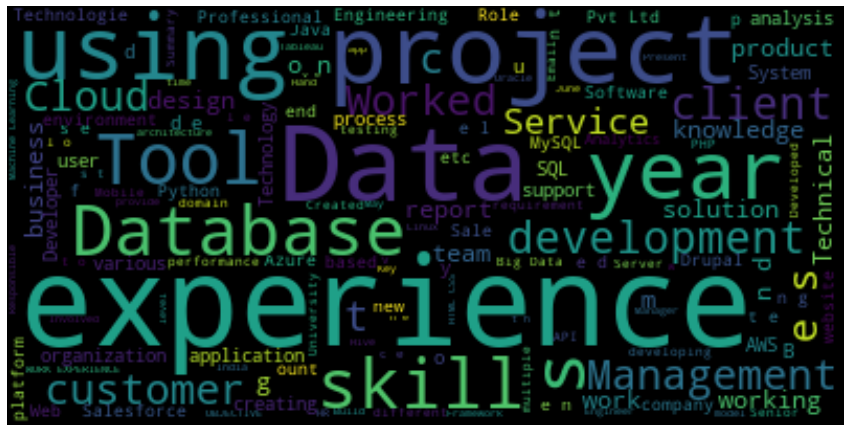

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['resume_string'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
SetOfStopWords= set(stopwords.words('english')+['``',"''"])

In [ ]:
totalWords= []

In [ ]:
Sentences = data['resume_string'].values

In [ ]:
cleanedSentences= ""

In [ ]:
for records in Sentences:
    cleanedText= cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in SetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

In [ ]:
print(len(totalWords))

75331


In [ ]:
print(cleanedText)

Page 1 PRIYANK GUPTA Mobile 91 9009054508 8319335916 E mail priyankguptagwalior Aspiring to be the best in class enterprise architect motivated towards transforming the business goals into business capabilities committed to the vision of boundary less information flow across the enterprise the master key for decision making and enabler of business growth and su ess ACADEMIC S EDUCATION M Phil Computer Science from SOSCSA Jiwaji University Gwalior in 2013 M Sc Computer Science from SMS Science College Gwalior in 2010 B Sc Computer Science from SMS Science College Gwalior in 2008 IT SKILLS Advanced Technologies Python Machine Learning Neural Network Django Nod eJS ReactJS MERN o Stack HTML CSS JavaScript and AWS Programming Skills C C NET PHP DataBase MongoDB MySQL SQL Server WORK EXPERIENCE Numeric Info Systems Pvt Ltd as Web Developer July 2013 to June 2018 Praedico Global Research Pvt Ltd as Web Developer cum ML NN Developer July 2018 to Present KNOWN TECHNOLOGIES MERN NodeJS ReactJS 

In [ ]:
print(len(cleanedSentences))

611337


In [ ]:
wordfreqdist = nltk.FreqDist(totalWords)

In [ ]:
wordfreqdist

FreqDist({'e': 723, 'n': 443, 'using': 385, 'r': 368, 'experience': 353, 'I': 331, 'data': 325, 'Data': 317, 'A': 309, 'Experience': 288, ...})

In [ ]:
mostcommon = wordfreqdist.most_common(30)

In [ ]:
mostcommon

[('e', 723),
 ('n', 443),
 ('using', 385),
 ('r', 368),
 ('experience', 353),
 ('I', 331),
 ('data', 325),
 ('Data', 317),
 ('A', 309),
 ('Experience', 288),
 ('development', 256),
 ('Developer', 244),
 ('l', 234),
 ('Worked', 216),
 ('c', 207),
 ('2', 198),
 ('years', 196),
 ('E', 195),
 ('project', 195),
 ('2019', 188),
 ('C', 185),
 ('S', 182),
 ('g', 182),
 ('knowledge', 179),
 ('team', 178),
 ('business', 177),
 ('Web', 174),
 ('91', 173),
 ('Management', 173),
 ('Development', 166)]

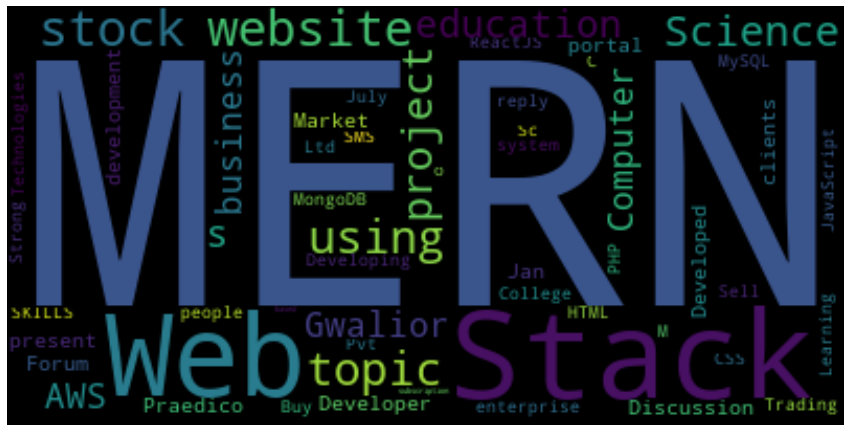

In [ ]:
from wordcloud import WordCloud
wordcloudimage = WordCloud( font_step=2 ,
max_font_size=500,
collocations = False,
#collocation_threshold = 1
).generate(cleanedText)
plt.figure(figsize=(15,15))
plt.imshow(wordcloudimage, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer('w+')
#Tokenizing the text
tokens = tokenizer.tokenize(cleanedSentences)
len(tokens)

4507

In [ ]:
print(tokens)

['w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w',

In [ ]:
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

TFIDF vectorizer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = data['cleaned_resume'].values
requiredTarget = data['Broad_Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(225, 1500)
(57, 1500)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state=1, gamma='auto')
svm.fit(X_train, y_train)
svm_prediction = svm.predict(X_test)
svm_score = svm.score(X_test, y_test)
print("SVM Classification Test Accuracy: {}%".format(round(svm.score(X_test,y_test)*100,2)))

#Confusion Matrix

svm_cm = confusion_matrix(y_test, svm_prediction)

#Mean Squared Error

svm_mse = mean_squared_error(y_test, svm_prediction)

SVM Classification Test Accuracy: 19.3%
